In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

%matplotlib inline

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load and Preprocessing the CIFAR10 Dataset

In [2]:
# Create label map
labels = {0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 
          5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}

# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Re-scale the images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Get the info about the dataset
print('Train:\t', x_train.shape, y_train.shape)
print('Test:\t', x_test.shape, y_test.shape)

Train:	 (50000, 32, 32, 3) (50000, 10)
Test:	 (10000, 32, 32, 3) (10000, 10)


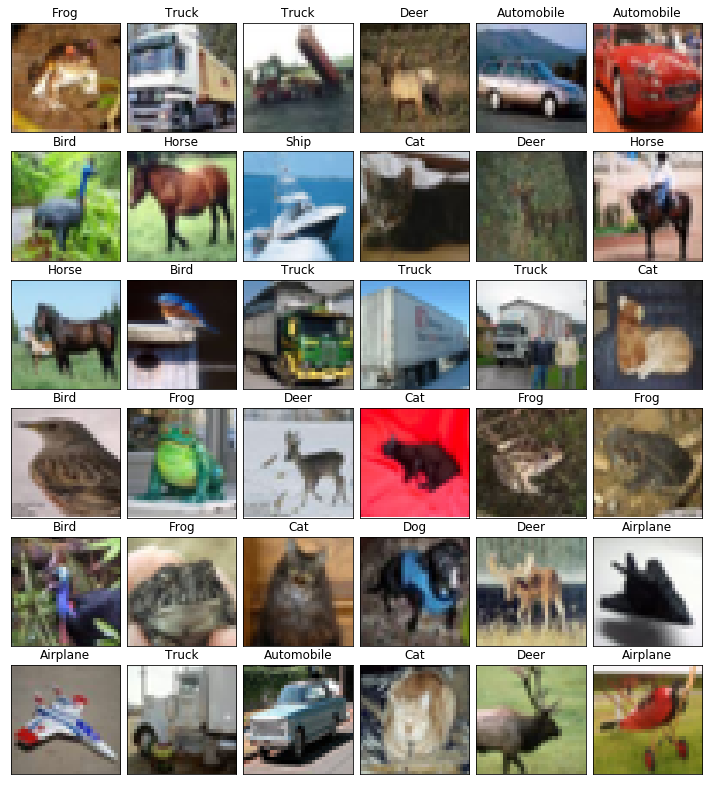

In [3]:
# Visualize the CIFAR10 dataset
nrows, ncols = 6, 6
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 11))
for row in range(nrows):
    for col in range(ncols):
        idx = row * ncols + col
        ax[row][col].imshow(x_train[idx])
        ax[row][col].set_title(labels[np.argmax(y_train[idx])])
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
plt.tight_layout(h_pad=0, w_pad=0)
fig.savefig('./result/snapshot.png', dpi=200)
plt.show()

# Build CNN Model

# Using Pre-trained CNN Model